# Imports

In [1]:
import json
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn import preprocessing as preproc
from sklearn.decomposition import PCA
import numpy as np

from scipy import stats

# https://stackoverflow.com/questions/52285104/3d-scatterplots-with-hue-colormap-and-legend
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

try:
  from google.colab import drive
  drive.mount('/content/drive')

  COLAB = True
except ModuleNotFoundError:
  COLAB = False

from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Blues_r', 128)
bottom = cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
cm_blue_grad = ListedColormap(newcolors, name='CustomBlue')

cm_bool = sns.color_palette("blend:#31bdff,white", as_cmap=True)

%matplotlib inline

/tmp/ipykernel_149356/3133511786.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top = cm.get_cmap('Blues_r', 128)
/tmp/ipykernel_149356/3133511786.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bottom = cm.get_cmap('Blues', 128)


# Load Data

In [2]:
df = pd.read_parquet("diabetic_data_cleaned.parquet")

# fix some types that parquet didn't get right
df["admission_type_id"] = df["admission_type_id"].astype("category")
df["discharge_disposition_id"] = df["discharge_disposition_id"].astype("category")
df["admission_source_id"] = df["admission_source_id"].astype("category")

display(df.shape)
display(df.dtypes)
display(df.head(2).T)

(100244, 29)

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
metformin                   category
repaglinide                 category
glimepiride                 category
glipizide                   category
glyburide                   category
pioglitazone                category
rosiglitazone               category
insulin                     category
glyburide-metformin         category
change                          bool
d

,0,1
race,Caucasian,AfricanAmerican
gender,Female,Female
age,[10-20),[20-30)
admission_type_id,1,1
discharge_disposition_id,1,1
admission_source_id,7,7
time_in_hospital,3,2
num_lab_procedures,59,11
num_procedures,0,5
num_medications,18,13


In [3]:
with open("data_dictionary.json", "r") as f:
  data_info = json.load(f)

NUM_COLUMNS = data_info["Numeric Columns"]
TGT = data_info["Target"]

# PCA

In [4]:
# Normalisation min-max scaling
x = df[NUM_COLUMNS]
x = preproc.MinMaxScaler().fit_transform(x)

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_numericals = pd.DataFrame(x, columns=feat_cols)
normalised_numericals.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.461538
1,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.230769
2,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.307692
3,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.153846
4,0.153846,0.229008,1.000000,0.1875,0.000000,0.0,0.000000,0.461538


In [5]:
pca = PCA(n_components=8)
principal_components = pca.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.46842595 0.27776598 0.10332927 0.09305336 0.0335908  0.01843882
 0.00467294 0.00072288]


In [6]:
pcs = 8
df_pcs = pd.DataFrame(data = principal_components[:, :pcs],
                     columns = [f"PC{i}" for i in range(1, pcs+1)])

df_pcs = df.join(df_pcs)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_pcs.head(2).T)

,0,1
race,Caucasian,AfricanAmerican
gender,Female,Female
age,[10-20),[20-30)
admission_type_id,1,1
discharge_disposition_id,1,1
admission_source_id,7,7
time_in_hospital,3,2
num_lab_procedures,59,11
num_procedures,0,5
num_medications,18,13


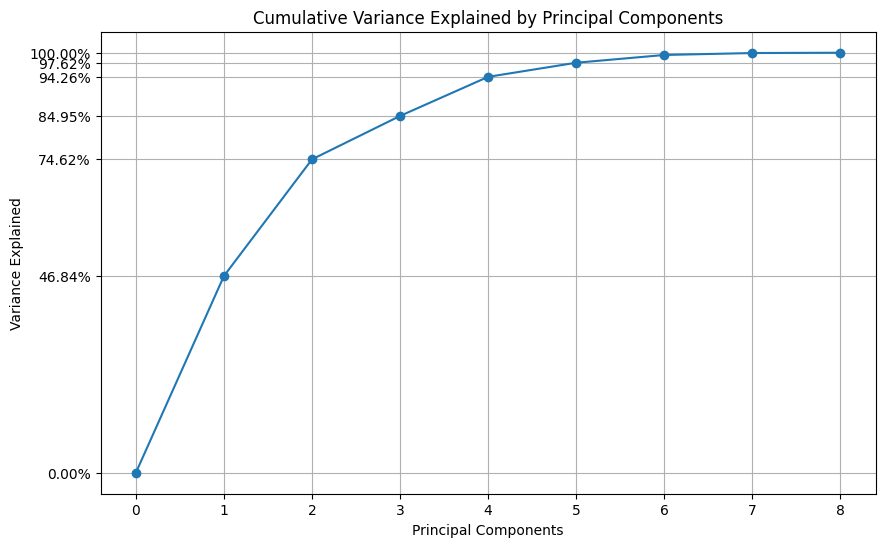

In [7]:
variances = {0: 0} | {
    i: sum(pca.explained_variance_ratio_[:i])
    for i in range(1, pca.n_components_+1)
}
x = list(variances.keys())
y = list(variances.values())

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker = "o")

plt.xticks(x)
plt.yticks(
    y[:6] + [y[-1]],
    [f"{k:.2%}" for k in y[:6] + [y[-1]]],
)

plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Cumulative Variance Explained by Principal Components")

plt.grid(True)

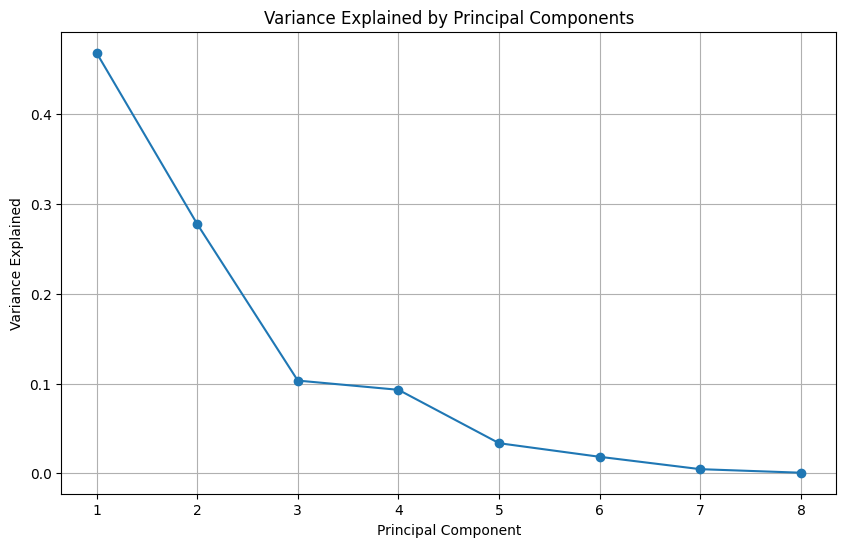

In [8]:
# plot variance explained not cumulative with a x-axis 1-based
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, marker = "o")
plt.xticks(range(1, pca.n_components_+1))
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Principal Components")
plt.grid(True)
plt.show()

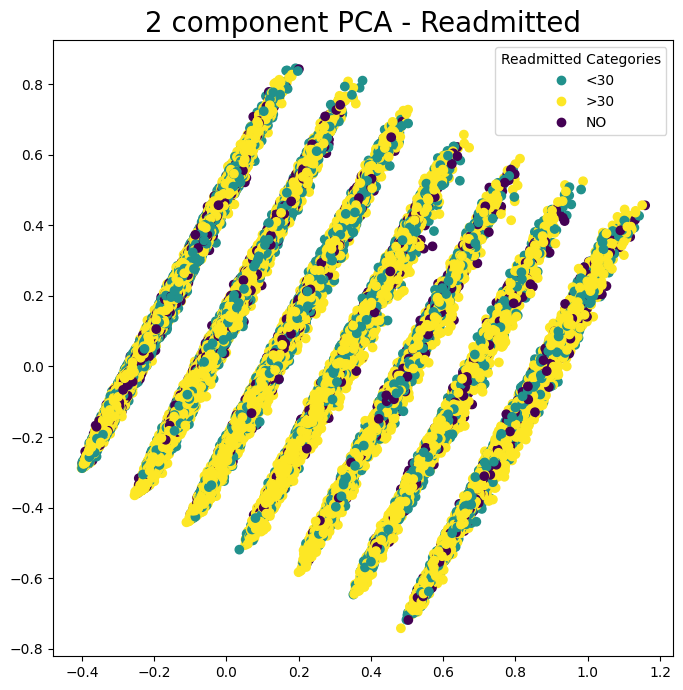

In [9]:
# Create a scatter plot
fig = plt.figure(figsize=(8, 8))
plt.title('2 component PCA - Readmitted', fontsize=20)
scatter = plt.scatter(
    df_pcs['PC1'],
    df_pcs['PC2'],
    c=df_pcs['readmitted'].astype("category").cat.codes,  # Use category codes for coloring
    cmap='viridis'
)

categories = df_pcs['readmitted'].astype("category").cat.categories
codes = df_pcs['readmitted'].astype("category").cat.codes.unique()

cmap = mpl.colormaps['viridis'].resampled(len(codes))
handles = [plt.Line2D([], [], marker='o', linestyle='', color=cmap(code), label=category)
           for category, code in zip(categories, codes)]
plt.legend(handles=handles, title="Readmitted Categories")

plt.show()

Text(0.5, 1.0, 'Correlation PCs and Numerical Columns')

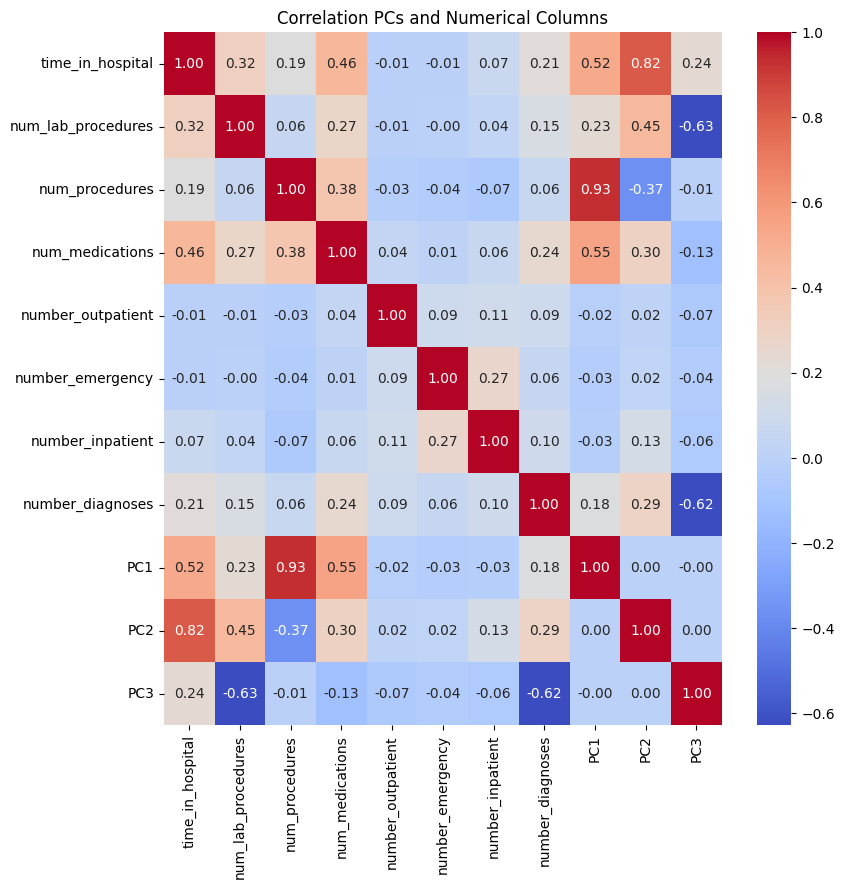

In [10]:
# do correlation of the first two PCs with the NUM_COLUMNS
corrs = df_pcs[NUM_COLUMNS + ["PC1", "PC2", "PC3"]].corr()

# plot the correlation matrix
plt.figure(figsize=(9, 9))
sns.heatmap(corrs, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation PCs and Numerical Columns")

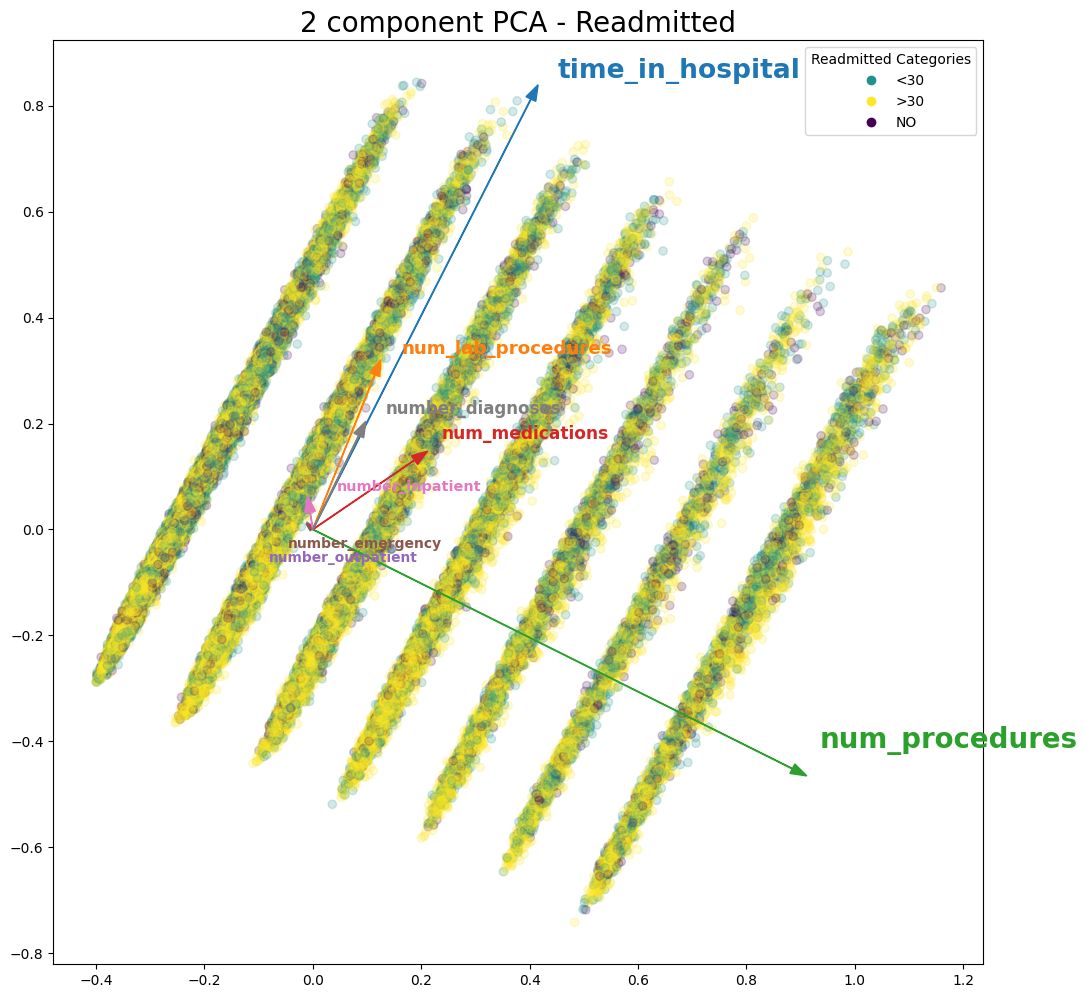

In [11]:
# plot the other numerical columns as vectors over the plot of the first two PCs
fig = plt.figure(figsize=(12, 12))
plt.title('2 component PCA - Readmitted', fontsize=20)
scatter = plt.scatter(
    df_pcs['PC1'],
    df_pcs['PC2'],
    c=df_pcs['readmitted'].astype("category").cat.codes, 
    alpha=.2,
    cmap='viridis'
)

categories = df_pcs['readmitted'].astype("category").cat.categories
codes = df_pcs['readmitted'].astype("category").cat.codes.unique()

cmap = mpl.colormaps['viridis'].resampled(len(codes))
handles = [plt.Line2D([], [], marker='o', linestyle='', color=cmap(code), label=category)
           for category, code in zip(categories, codes)]

plt.legend(handles=handles, title="Readmitted Categories")

for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    norm = np.linalg.norm([comp1, comp2])
    if max([comp1, comp2]) < .02:
        plt.arrow(0, 0, comp1, comp2, color=f"C{i}", head_width=.01)
        plt.text(comp1 - .05 * 500*norm, comp2 - .04 * 500*norm, NUM_COLUMNS[i], color=f"C{i}", fontsize=10-20*norm, fontweight="bold")
    else:
        # get arrow norm
        plt.arrow(0, 0, comp1, comp2, color=f"C{i}", head_width=.02)
        plt.text(comp1 + .05, comp2 + .04, NUM_COLUMNS[i], color=f"C{i}", fontsize=10+10*norm, fontweight="bold")

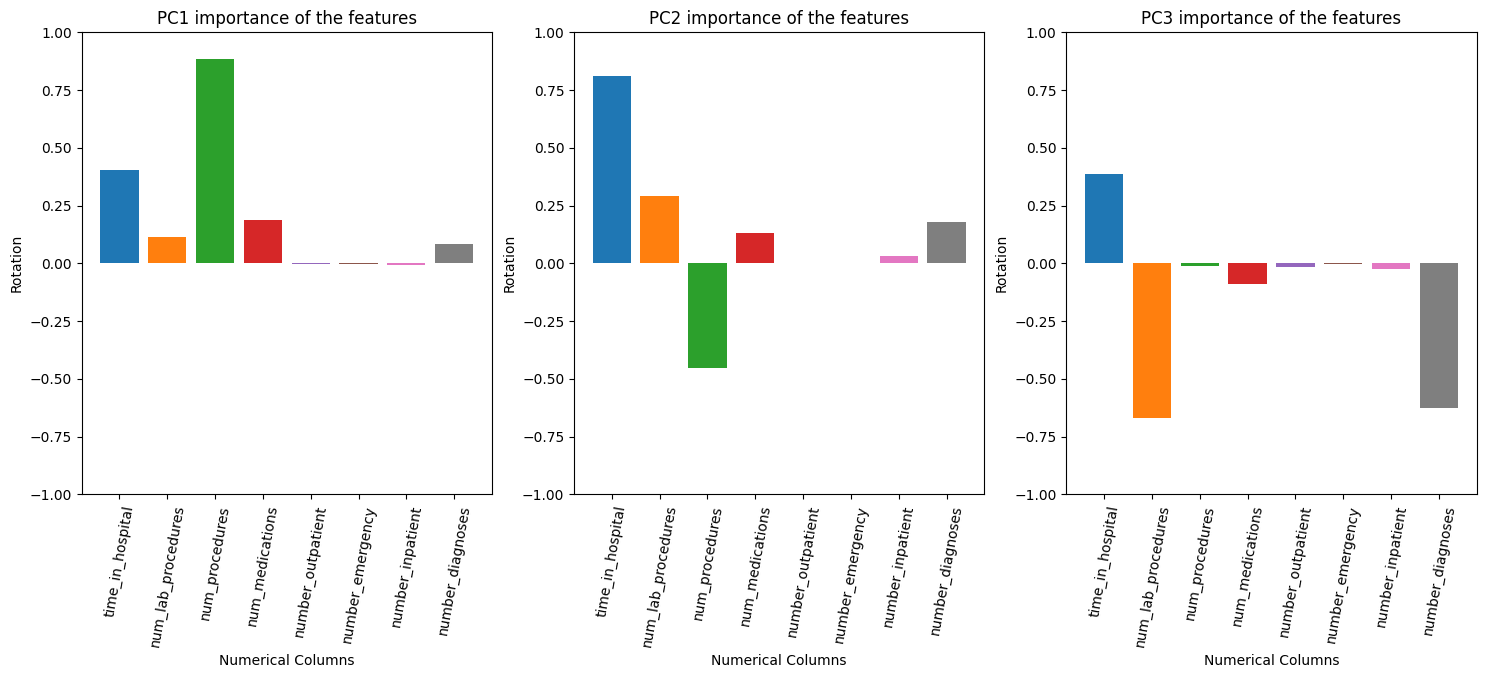

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, pc in enumerate(["PC1", "PC2", "PC3"]):
    ax[i].set_title(f"PC{i+1} importance of the features")
    ax[i].set_xticks(range(len(NUM_COLUMNS)))
    ax[i].set_xticklabels(NUM_COLUMNS, rotation=80)
    ax[i].set_ylabel("Rotation")
    ax[i].set_xlabel("Numerical Columns")
    ax[i].bar(NUM_COLUMNS, pca.components_[i], color=[f"C{i}" for i in range(len(NUM_COLUMNS))])
    ax[i].set_ylim(-1, 1)

### Filtering the first 3 PCs

In [13]:
#join df and pc_df

PC_COLUMNS = ["PC1", "PC2", "PC3"]

df_pcs = df_pcs.drop(columns=[f"PC{i}" for i in range(4, 9)], errors="ignore")

display(df_pcs.dtypes)
df_pcs.head(2).T

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
metformin                   category
repaglinide                 category
glimepiride                 category
glipizide                   category
glyburide                   category
pioglitazone                category
rosiglitazone               category
insulin                     category
glyburide-metformin         category
change                          bool
d

,0,1
race,Caucasian,AfricanAmerican
gender,Female,Female
age,[10-20),[20-30)
admission_type_id,1,1
discharge_disposition_id,1,1
admission_source_id,7,7
time_in_hospital,3,2
num_lab_procedures,59,11
num_procedures,0,5
num_medications,18,13


### Rerunning EDA results to this PCs

In [14]:
anova_results = []
for col in PC_COLUMNS:
    groups = df_pcs.groupby(TGT, observed=False)[col].apply(np.array)
    f, p = stats.f_oneway(groups["<30"], groups[">30"])
    anova_results.append((col, f, p))

anova_results = pd.DataFrame(anova_results, columns=["Variable", "F", "p-value"])
anova_results["p-value < 0.05"] = anova_results["p-value"] < 0.05
display(anova_results
        .style
        .set_caption("ANOVA test results - Predicting <30 vs >30 days readmission")
        .background_gradient(axis=0, gmap=anova_results["p-value < 0.05"], cmap=cm_bool, vmin=0, vmax=1))

,Variable,F,p-value,p-value < 0.05
0,PC1,21.459796,0.000004,True
1,PC2,51.980559,0.000000,True
2,PC3,4.637329,0.031289,True


In [15]:
anova_results = []
for col in PC_COLUMNS:
    groups = df_pcs.groupby(TGT, observed=False)[col].apply(np.array)
    f, p = stats.f_oneway(groups["NO"], groups[">30"])
    anova_results.append((col, f, p))

anova_results = pd.DataFrame(anova_results, columns=["Variable", "F", "p-value"])
anova_results["p-value < 0.05"] = anova_results["p-value"] < 0.05
display(anova_results
        .style
        .set_caption("ANOVA test results - Predicting <30 vs >30 days readmission")
        .background_gradient(axis=0, gmap=anova_results["p-value < 0.05"], cmap=cm_bool, vmin=0, vmax=1))

,Variable,F,p-value,p-value < 0.05
0,PC1,38.793768,0.000000,True
1,PC2,545.281924,0.000000,True
2,PC3,428.296944,0.000000,True


In [16]:
anova_results = []
for col in PC_COLUMNS:
    groups = df_pcs.groupby(TGT, observed=False)[col].apply(np.array)
    f, p = stats.f_oneway(groups["<30"], groups["NO"])
    anova_results.append((col, f, p))

anova_results = pd.DataFrame(anova_results, columns=["Variable", "F", "p-value"])
anova_results["p-value < 0.05"] = anova_results["p-value"] < 0.05
display(anova_results
        .style
        .set_caption("ANOVA test results - Predicting <30 vs >30 days readmission")
        .background_gradient(axis=0, gmap=anova_results["p-value < 0.05"], cmap=cm_bool, vmin=0, vmax=1))

,Variable,F,p-value,p-value < 0.05
0,PC1,0.396454,0.528928,False
1,PC2,513.314760,0.000000,True
2,PC3,131.247512,0.000000,True


### Conclusion

Using the cumulative and non-cumulative graphs, we conclude that using the first 3 principal components rather than the 8 original numerical variables is fine since it doesn't lead to a significant loss of information. When training the models, try both. The other graphs can be used in the report to explain the principal components of our dataset. A small caveat regarding the last plot is that PC1 might not explain the variance of Predicting <30 and >30, which is curious but does not justify not using it.

# Save Dataset with PCs

In [17]:
display(df_pcs.shape)
display(df_pcs.dtypes)

filename = "diabetic_data_cleaned_pca"

df_pcs.to_csv(f"{filename}.csv", index=False)
df_pcs.to_parquet(f"{filename}.parquet")

(100244, 32)

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
metformin                   category
repaglinide                 category
glimepiride                 category
glipizide                   category
glyburide                   category
pioglitazone                category
rosiglitazone               category
insulin                     category
glyburide-metformin         category
change                          bool
d